In [6]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


The `%matplotlib inline` magic command in the provided code uses the default Matplotlib coordinate system, which assumes the origin at the bottom-left corner, causing potential differences in image orientation compared to OpenCV's coordinate system. To align the coordinate systems and prevent y-axis inversion, the `plt.imshow` function should be used with the `origin='upper'` parameter when displaying images in a Jupyter Notebook or Jupyter Lab environment.

In [7]:

ds_path = "leaf_image.jpg"

In [8]:
test_img_path = ds_path 

In [9]:
test_img_path

'leaf_image.jpg'

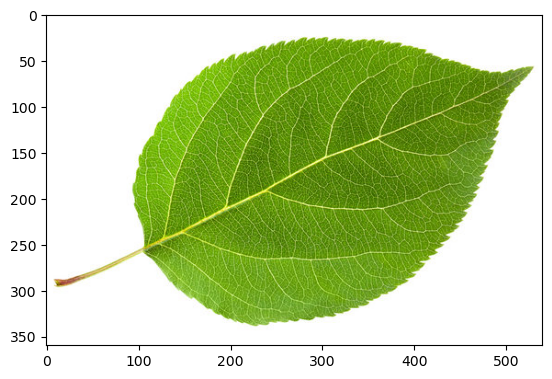

In [10]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

OpenCV convention:
In OpenCV, the origin (0,0) is at the top-left corner of the image.
The y-axis increases downward, and the x-axis increases to the right.

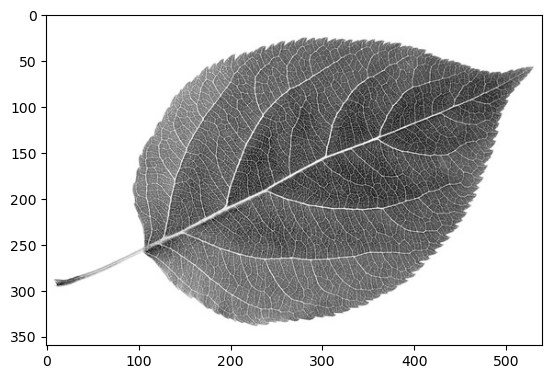

In [11]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')


The inversion of the image axis in the provided code may arise from the default Matplotlib coordinate system, which expects the origin at the bottom-left corner, while OpenCV uses the top-left corner as the origin. To correct this, the `plt.imshow` function should be used with the `origin='upper'` parameter when displaying a grayscale image, ensuring proper alignment of the coordinate systems.

In [12]:
gs.shape

(360, 540)

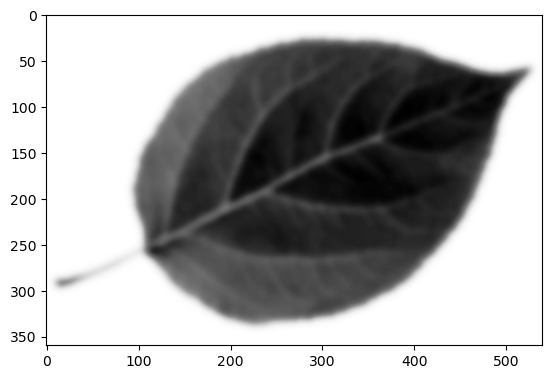

In [13]:

blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

The inversion of the image axis in the provided code may arise from the default Matplotlib coordinate system, which expects the origin at the bottom-left corner, while OpenCV uses the top-left corner as the origin. To correct this, the `plt.imshow` function should be used with the `origin='upper'` parameter when displaying a grayscale image, ensuring proper alignment of the coordinate systems.

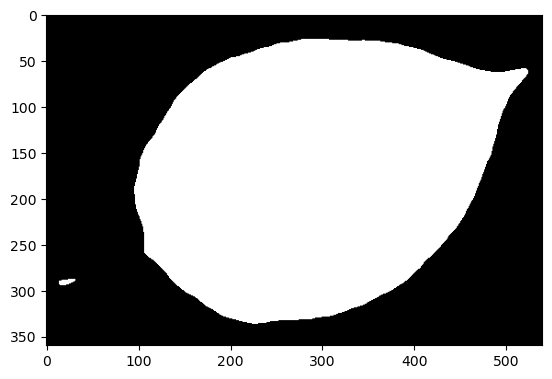

In [14]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')


The inversion is a result of the way images are typically displayed in computer graphics, where the origin is at the top-left corner. When using cv2.THRESH_BINARY_INV, black and white regions are inverted, making the background white and the foreground black. This inversion is correctly displayed by Matplotlib without the need for the origin='upper' parameter.

In [15]:
# Creating a 50x50 matrix filled with ones, which serves as the kernel

kernel = np.ones((50,50),np.uint8)

# Applying a morphological closing operation to the binary image 'im_bw_otsu'


closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

In summary, the code is creating a 50x50 square structuring element (kernel) filled with ones and then applying a morphological closing operation to the binary image im_bw_otsu. This operation helps in closing small gaps or holes in the binary image, making the foreground regions more connected and compact. The size of the kernel (50x50 in this case) can be adjusted based on the specific characteristics of the image and the desired effect of the morphological operation.








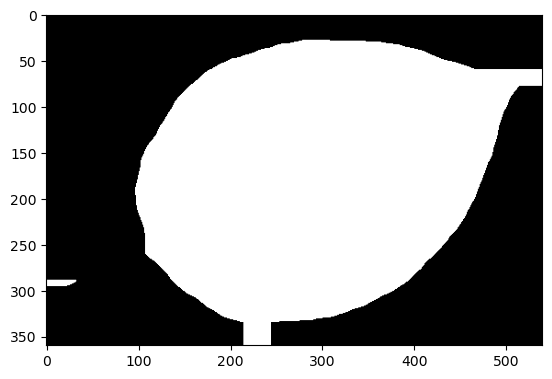

In [16]:
#Displaying the result of the morphological closing operation using Matplotlib

plt.imshow(closing,cmap='Greys_r')

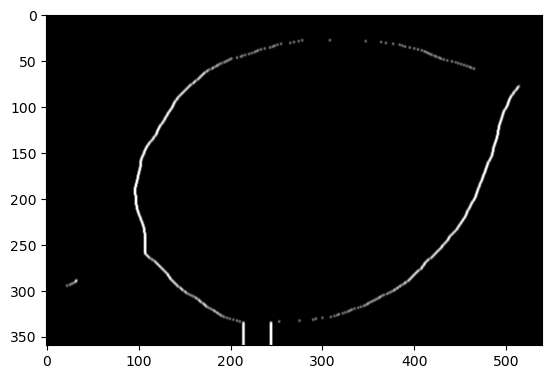

In [17]:
# Applying Sobel edge detection along the x-axis to the binary image 'closing'

sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)

# Taking the absolute value of the Sobel result to get magnitude

abs_sobel64f = np.absolute(sobelx64f)

# Converting the magnitude values to 8-bit unsigned integers

sobel_8u = np.uint8(abs_sobel64f)

# Displaying the Sobel edge detection result using Matplotlib

plt.imshow(abs_sobel64f,cmap='Greys_r')


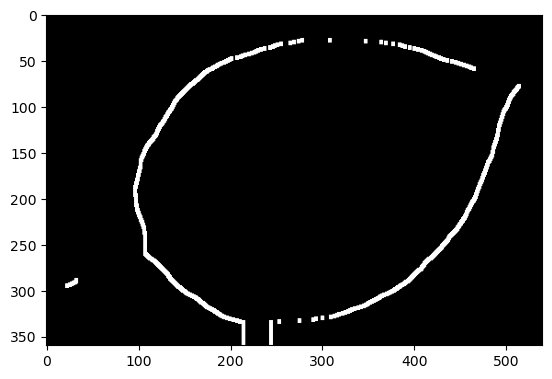

In [18]:
# Thresholding the Sobel edge detection result to obtain a binary image

ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)

# Displaying the binary image obtained after thresholding

plt.imshow(im_bw_sobel,cmap='Greys_r')


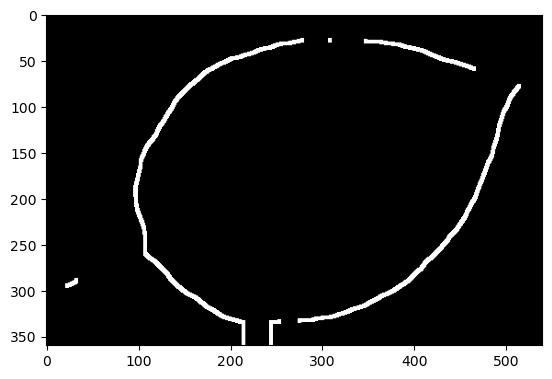

In [19]:
# Creating a 15x15 square structuring element (kernel) filled with ones
kernel_edge = np.ones((15, 15), np.uint8)

# Applying a morphological closing operation to the binary image 'im_bw_sobel'
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)

# Displaying the result of the morphological closing operation on the binary edge-detected image
plt.imshow(closing_edge, cmap='Greys_r')


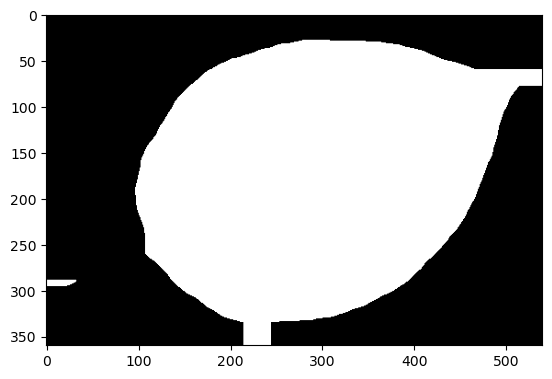

In [20]:
# Displaying the result of the previous morphological closing operation
plt.imshow(closing, cmap="Greys_r")


In [21]:
# Finding contours in the binary image obtained after the morphological closing operation
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [22]:
len(contours)

2

In [23]:
# Selecting the first contour from the list of contours
cnt = contours[0]

# Printing the number of points in the selected contour
len(cnt)


13

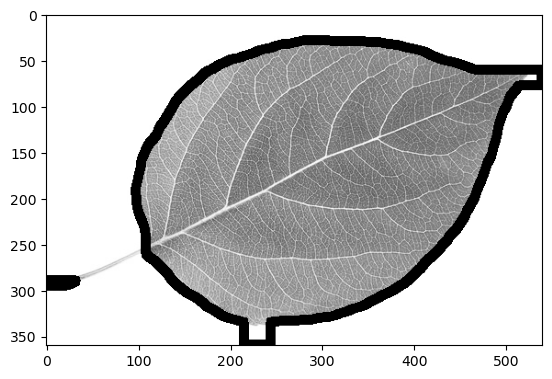

In [24]:
# Drawing contours on the grayscale image
plottedContour = cv2.drawContours(gs, contours, -1, (0, 255, 0), 10)

# Displaying the image with drawn contours
plt.imshow(plottedContour, cmap="Greys_r")


In [25]:
# Calculating the moments of the selected contour
M = cv2.moments(cnt)
M

{'m00': 168.5,
 'm10': 2399.833333333333,
 'm01': 49167.83333333333,
 'm20': 46166.416666666664,
 'm11': 699807.875,
 'm02': 14347527.416666666,
 'm30': 1010846.75,
 'm21': 13454318.583333334,
 'm12': 204075435.58333334,
 'm03': 4186854740.75,
 'mu20': 11987.18801516651,
 'mu11': -456.8452439827379,
 'mu02': 489.8220408856869,
 'mu30': 11878.130767459748,
 'mu21': -3900.855091114994,
 'mu12': -234.2315035315869,
 'mu03': 119.11774063110352,
 'nu20': 0.42219929787764304,
 'nu11': -0.016090491031275717,
 'nu02': 0.017251962802725635,
 'nu30': 0.032229111959844646,
 'nu21': -0.010584249149292855,
 'nu12': -0.0006355438830933751,
 'nu03': 0.00032320396823048194}

In [26]:
# Calculating the area of the selected contour
area = cv2.contourArea(cnt)
area

168.5

In [27]:
# Calculating the perimeter (arc length) of the selected contour
perimeter = cv2.arcLength(cnt, True)
perimeter

73.0710676908493

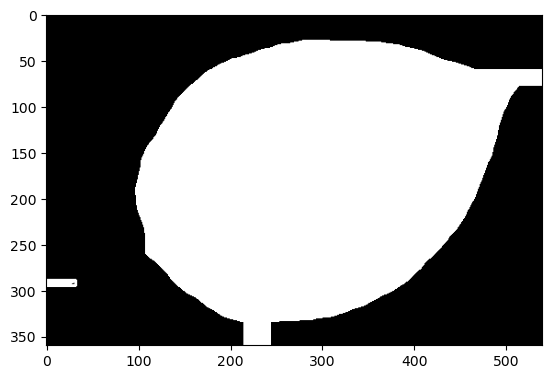

In [28]:
# Finding the minimum area bounding rectangle (rotated rectangle) for the selected contour
rect = cv2.minAreaRect(cnt)

# Extracting the four corner points of the rectangle
box = cv2.boxPoints(rect)
box = np.intp(box)

# Drawing the bounding box on the binary image after closing operation
contours_im = cv2.drawContours(closing, [box], 0, (255, 255, 255), 2)

# Displaying the image with the drawn bounding box
plt.imshow(contours_im, cmap="Greys_r")



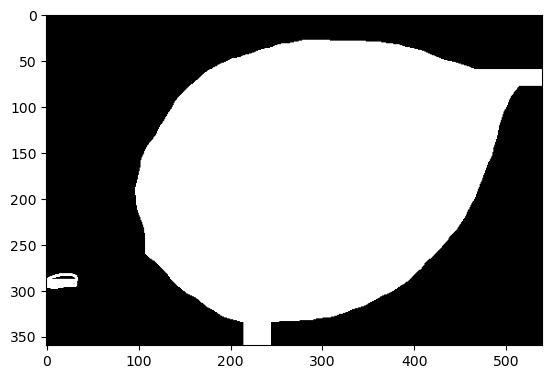

In [29]:
# Fitting an ellipse to the selected contour
ellipse = cv2.fitEllipse(cnt)

# Drawing the fitted ellipse on the binary image after closing operation
im = cv2.ellipse(closing, ellipse, (255, 255, 255), 2)

# Displaying the binary image with the drawn ellipse
plt.imshow(closing, cmap="Greys_r")


In [30]:
# Obtaining the bounding rectangle (upright rectangle) for the selected contour
x, y, w, h = cv2.boundingRect(cnt)

# Calculating the aspect ratio of the bounding rectangle
aspect_ratio = float(w) / h

# Displaying the calculated aspect ratio
aspect_ratio


4.714285714285714

In [31]:
# Calculating rectangularity, the ratio of the area of the bounding rectangle to the contour area
rectangularity = w * h / area

# Displaying the calculated rectangularity
rectangularity


1.370919881305638

In [32]:
# Calculating circularity, a measure of how close the contour is to a perfect circle
circularity = ((perimeter)**2) / area

# Displaying the calculated circularity
circularity


31.68772067347585

In [33]:
# Calculating the equivalent diameter, the diameter of a circle with the same area as the contour
equi_diameter = np.sqrt(4 * area / np.pi)

# Displaying the calculated equivalent diameter
equi_diameter


14.647213499088313

In [34]:
# Fitting an ellipse to the selected contour and extracting ellipse parameters

(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

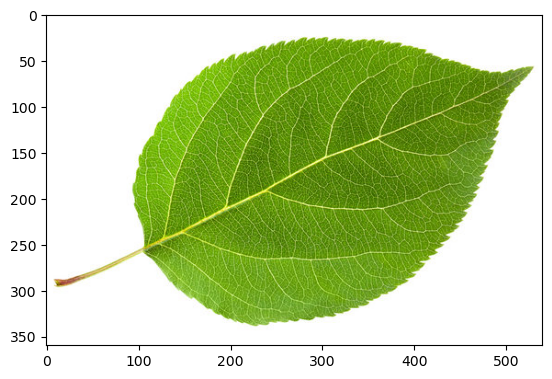

In [35]:
# Displaying the original image

plt.imshow(img,cmap="Greys_r")

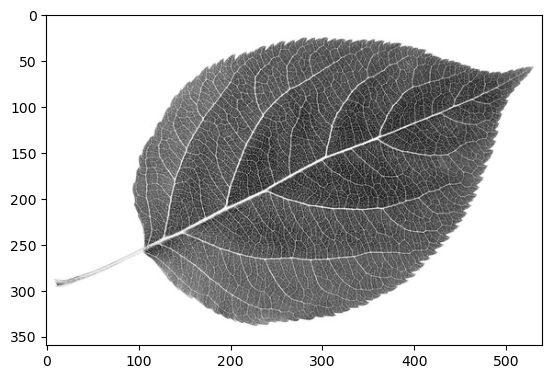

In [36]:
# Extracting the red channel from the original image
red_channel = img[:, :, 0]

# Displaying the red channel as a grayscale image
plt.imshow(red_channel, cmap="Greys_r")


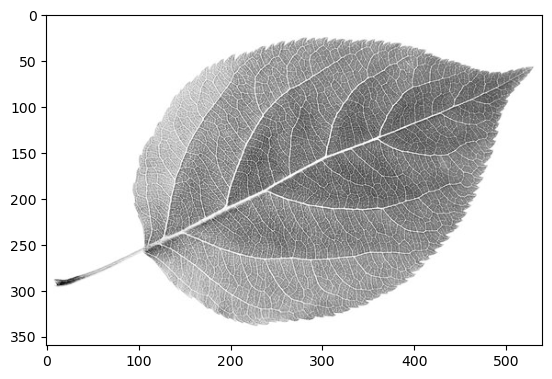

In [37]:
# Extracting the green channel from the original image
green_channel = img[:, :, 1]

# Displaying the green channel as a grayscale image
plt.imshow(green_channel, cmap="Greys_r")



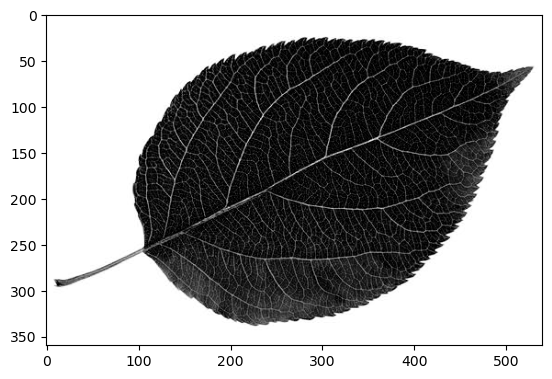

In [38]:
# Extracting the blue channel from the original image
blue_channel = img[:, :, 2]

# Displaying the blue channel as a grayscale image
plt.imshow(blue_channel, cmap="Greys_r")


In [39]:
# Calculating the mean intensity value of the pixel values in the blue channel
np.mean(blue_channel)

np.mean(blue_channel)

139.98936728395063

In [40]:
# Calculating the mean intensity value of the pixel values in the green channel
np.mean(green_channel)

206.0249279835391

In [41]:
# Calculating the mean intensity value of the pixel values in the red channel
np.mean(red_channel)

181.94123971193414

In [42]:
# Setting white pixels to black (0) in the blue channel
blue_channel[blue_channel == 255] = 0

# Setting white pixels to black (0) in the green channel
green_channel[green_channel == 255] = 0

# Setting white pixels to black (0) in the red channel
red_channel[red_channel == 255] = 0


In [43]:
# Calculating the mean intensity value of the pixel values in the red channel
red_mean = np.mean(red_channel)
red_mean

59.917705761316874

In [44]:
# Calculating the mean intensity value of the pixel values in the green channel

green_mean = np.mean(green_channel)
green_mean

83.69838477366255

In [45]:
# Calculating the mean intensity value of the pixel values in the blue channel

blue_mean = np.mean(blue_channel)
blue_mean

17.947469135802468

In [46]:

# Calculating the standard deviation (variability) of the pixel values in the red channel
red_var = np.std(red_channel)
red_var

64.41775179387123

In [47]:
# Calculating the standard deviation (variability) of the pixel values in the blue channel

blue_var=np.std(blue_channel)
blue_var

41.31255498460539

In [48]:
# Calculating the standard deviation (variability) of the pixel values in the green channel

green_var=np.std(green_channel)
green_var

83.75357123682492

In [49]:
red_channel

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [50]:
blue_channel

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [51]:
green_channel

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [52]:
# Importing the mahotas library with the alias 'mt'
import mahotas as mt

# Calculating Haralick textures features for the grayscale image
textures = mt.features.haralick(gs)

# Calculating the mean Haralick textures features along axis 0
ht_mean = textures.mean(axis=0)
ht_mean


array([ 2.09558625e-01,  7.95733908e+02,  9.40721220e-01,  6.71189573e+03,
        5.51912532e-01,  3.53306071e+02,  2.60518490e+04,  4.89167784e+00,
        7.49887092e+00,  1.11203177e-03,  3.75146635e+00, -3.15305214e-01,
        9.69256135e-01])

In [53]:
# Printing specific Haralick texture features from the mean values
print(ht_mean[1])  # Contrast
print(ht_mean[2])  # Correlation
print(ht_mean[4])  # Inverse Difference Moments
print(ht_mean[8])  # Entropy


795.733908238248
0.9407212195807195
0.5519125316382583
7.49887091721093




1. **Entropy:**
   - **Definition:** Entropy measures the randomness or disorder in an image.
   - **In Context:** In the context of texture analysis, high entropy indicates a more complex or random texture, while low entropy suggests a more ordered or uniform texture.

2. **Inverse Difference Moments (IDM):**
   - **Definition:** IDM is a measure of local homogeneity or smoothness in an image.
   - **In Context:** High IDM values suggest a more homogeneous or smooth texture, while lower values indicate more variation or heterogeneity.

3. **Correlation:**
   - **Definition:** Correlation measures the linear dependence between the intensity values of a pixel and its neighbors at a given offset.
   - **In Context:** High correlation values suggest a more structured or predictable texture, while low values indicate a less structured or more complex texture.

4. **Contrast:**
   - **Definition:** Contrast measures the local variations in pixel intensities.
   - **In Context:** High contrast values indicate regions with sharp intensity transitions, contributing to a more visually distinct or textured appearance. Lower contrast values suggest smoother transitions between intensity levels.



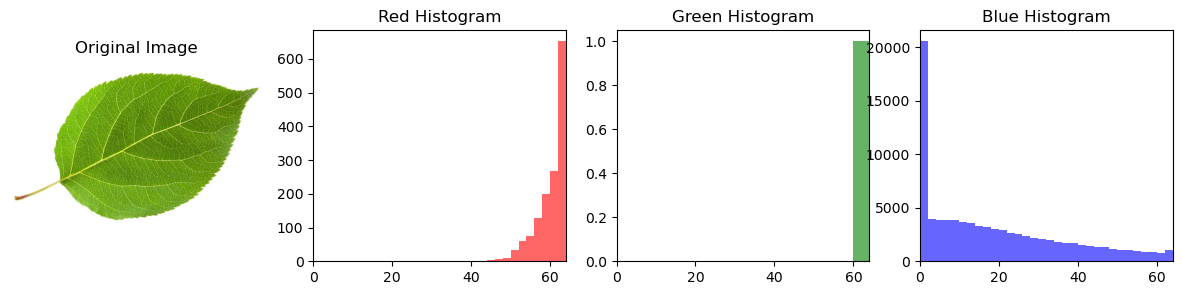

In [54]:
# Read a color image
image_color = cv2.imread("leaf_image.jpg")

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# Plot histograms for each color channel
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# Plot the original image
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot histograms for each color channel
for i, color in enumerate(['Red', 'Green', 'Blue']):
    axes[i + 1].hist(image_rgb[:,:,i].ravel(), bins=32, range=[0,64], color=color.lower(), alpha=0.6)
    axes[i + 1].set_title(f'{color} Histogram')
    axes[i + 1].set_xlim([0, 64])

plt.show()


Threshold limit: 57.0


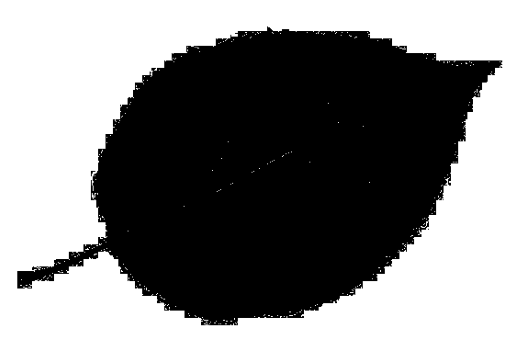

In [55]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to the grayscale image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

# Set axis properties to not show ticks and labels
plt.axis('off')

# Display the thresholded image using a grayscale colormap
plt.imshow(thresh, cmap='gray')


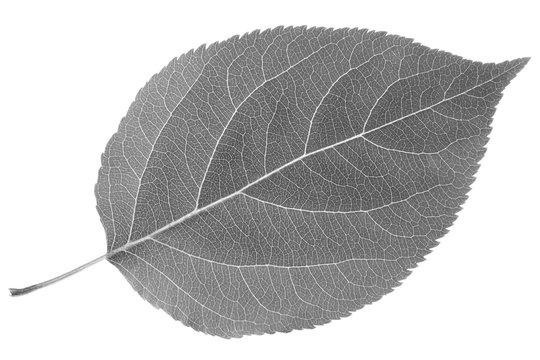

In [56]:
# Importing the Image class from the Python Imaging Library (PIL)
from PIL import Image

# Enabling inline plotting for Matplotlib
%matplotlib inline

# Opening an image file named "leaf_image.jpg"
image = Image.open("leaf_image.jpg")

# Displaying the image
image

im = image.convert('L')
im


In [57]:
arr = np.array(im)

In [58]:
# Noise removal using morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding the unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


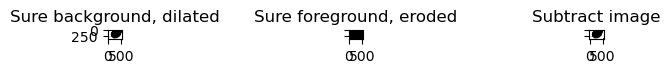

In [59]:
# Creating subplots with 1 row and 3 columns
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

# Displaying the sure background, dilated
ax1.imshow(sure_bg, cmap='gray')
ax1.set_title('Sure background, dilated')

# Displaying the sure foreground, eroded
ax2.imshow(sure_fg, cmap='gray')
ax2.set_title('Sure foreground, eroded')

# Displaying the subtracted image (unknown region)
ax3.imshow(unknown, cmap='gray')
ax3.set_title('Subtract image')

# Fine-tuning the layout to adjust the spacing between subplots
f.subplots_adjust(wspace=15.9)


# Read input image and convert colorspace to RGB


# Display image using matplotlib with origin='upper' to align coord systems


# Convert image to grayscale


# Apply Gaussian blurring to reduce noise


# Apply Otsu's thresholding to obtain binary image

# Perform morphological operations like closing to fill gaps

# Apply Canny edge detection


# Find contours and analyze properties like area, perimeter etc.


# Fit bounding box, ellipse to detect leaf shape


# Extract and analyze individual color channels


# Calculate Haralick texture features using mahotas


# Plot histograms of color channels


# Apply Otsu's thresholding on grayscale image

# Convert to PIL Image and numpy array


# Perform morphological operations like opening, dilation, erosion for segmentation

# Identify sure foreground, background, and unknown regions



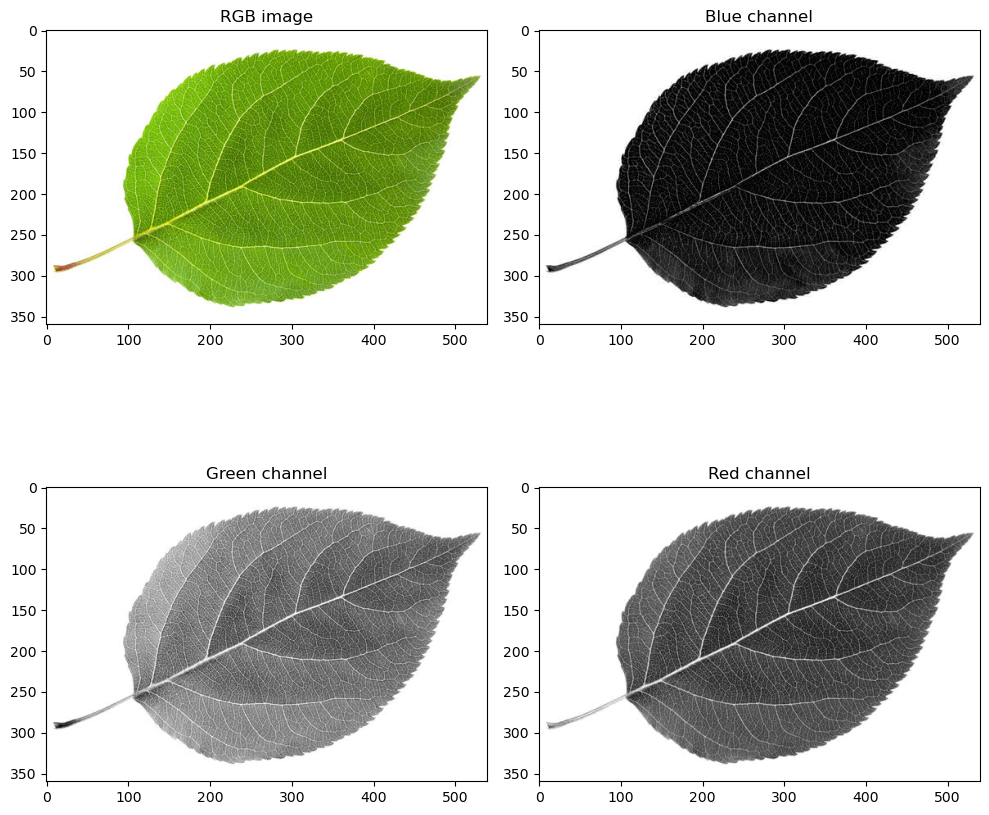

In [60]:
# Assuming `main_img` is your BGR image
# Convert BGR to RGB for correct display with matplotlib
rgb_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)

# Splitting the image into its constituent channels
blue_channel = main_img[:, :, 0]
green_channel = main_img[:, :, 1]
red_channel = main_img[:, :, 2]

# Plotting
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(rgb_img)
plt.title("RGB image")

plt.subplot(222)
plt.imshow(blue_channel, cmap='gray')
plt.title("Blue channel")

plt.subplot(223)
plt.imshow(green_channel, cmap='gray')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(red_channel, cmap='gray')
plt.title("Red channel")

plt.tight_layout()
plt.show()

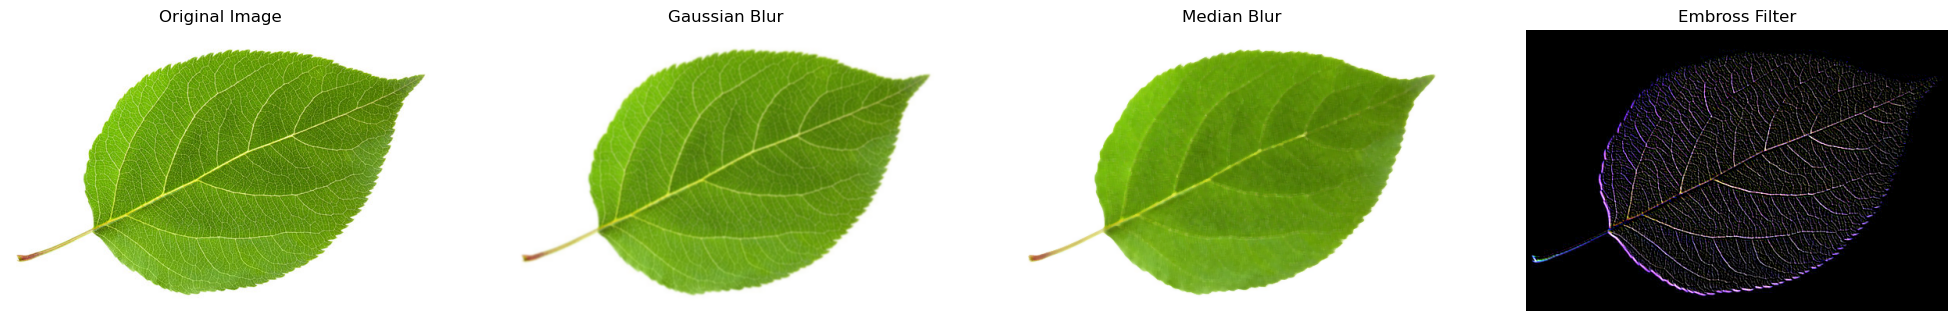

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in BGR format
main_img = cv2.imread('leaf_image.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(main_img, (5, 5), 0)

# Median Filter
median_blur = cv2.medianBlur(main_img, 5)

# Custom Kernel (Embross Filter)
kernel_embross = np.array([[0, -1, -1],
                           [1,  0, -1],
                           [1,  1,  0]])
embross_filter = cv2.filter2D(main_img, -1, kernel_embross)

# Display the original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(25, 10))

axes[0].imshow(cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
axes[1].set_title('Gaussian Blur')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
axes[2].set_title('Median Blur')
axes[2].axis('off')

axes[3].imshow(cv2.cvtColor(embross_filter, cv2.COLOR_BGR2RGB))
axes[3].set_title('Embross Filter')
axes[3].axis('off')

plt.show()


Image Filtering:
Apply different types of filters like Gaussian blur, median filter, or custom kernels to smooth or sharpen images.

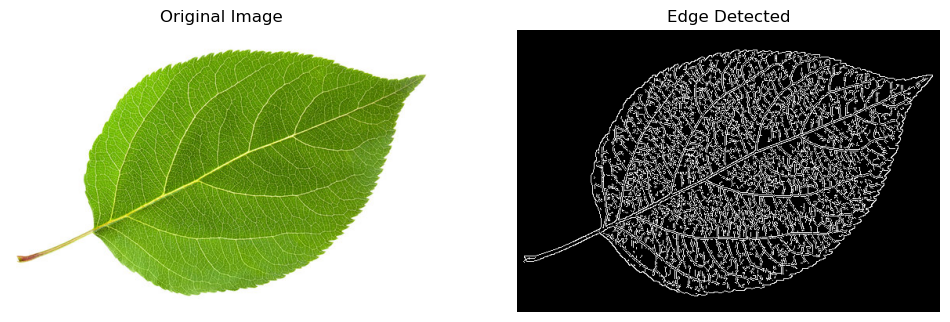

In [7]:

# Apply Canny edge detection
edges = cv2.Canny(gray_img, 100, 200)  # Adjust threshold values as needed

# Display the original and edge-detected images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Edge Detected')
axes[1].axis('off')

plt.show()

Edge Detection:
Implement edge detection algorithms such as Canny edge detector or Sobel operator to identify edges in images.

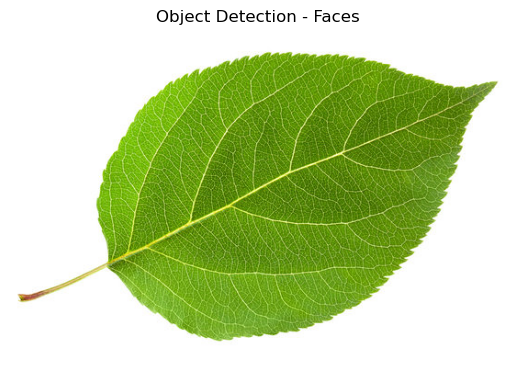

In [63]:
# Convert the image to grayscale
gray_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)

# Load the pre-trained face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(main_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the original image with detected faces
plt.imshow(cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB))
plt.title('Object Detection - Faces')
plt.axis('off')
plt.show()

Utilize pre-trained models like Haar cascades or deep learning models (e.g., YOLO, SSD) to detect objects in images.



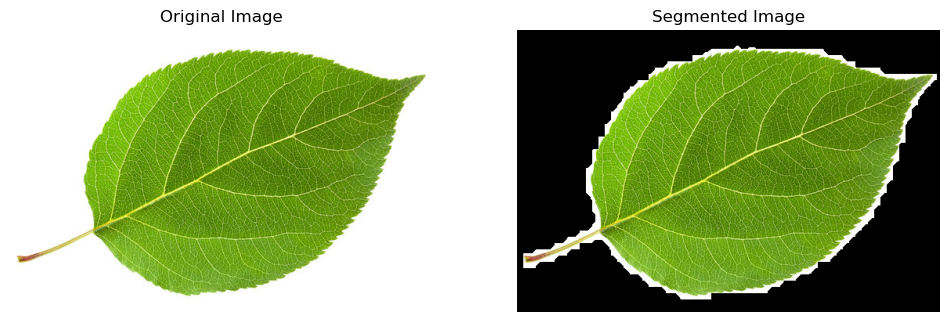

In [64]:
# Create a mask initialized with zeros of the same dimensions as the image
mask = np.zeros(main_img.shape[:2], np.uint8)

# Initialize the background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define the rectangle region containing the object to segment (in this case, the whole image)
rect = (0, 0, main_img.shape[1] - 1, main_img.shape[0] - 1)

# Apply GrabCut algorithm to segment the image
cv2.grabCut(main_img, mask, rect, bgd_model, fgd_model, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

# Modify the mask to indicate the regions classified as probable background and probable foreground
segmented_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the segmented mask to the original image
segmented_image = main_img * segmented_mask[:, :, np.newaxis]

# Display the original image and the segmented image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Segmented Image')
axes[1].axis('off')

plt.show()


Image Segmentation:
Segment images into different regions using techniques like thresholding, watershed segmentation, or deep learning-based segmentation models (e.g., U-Net).

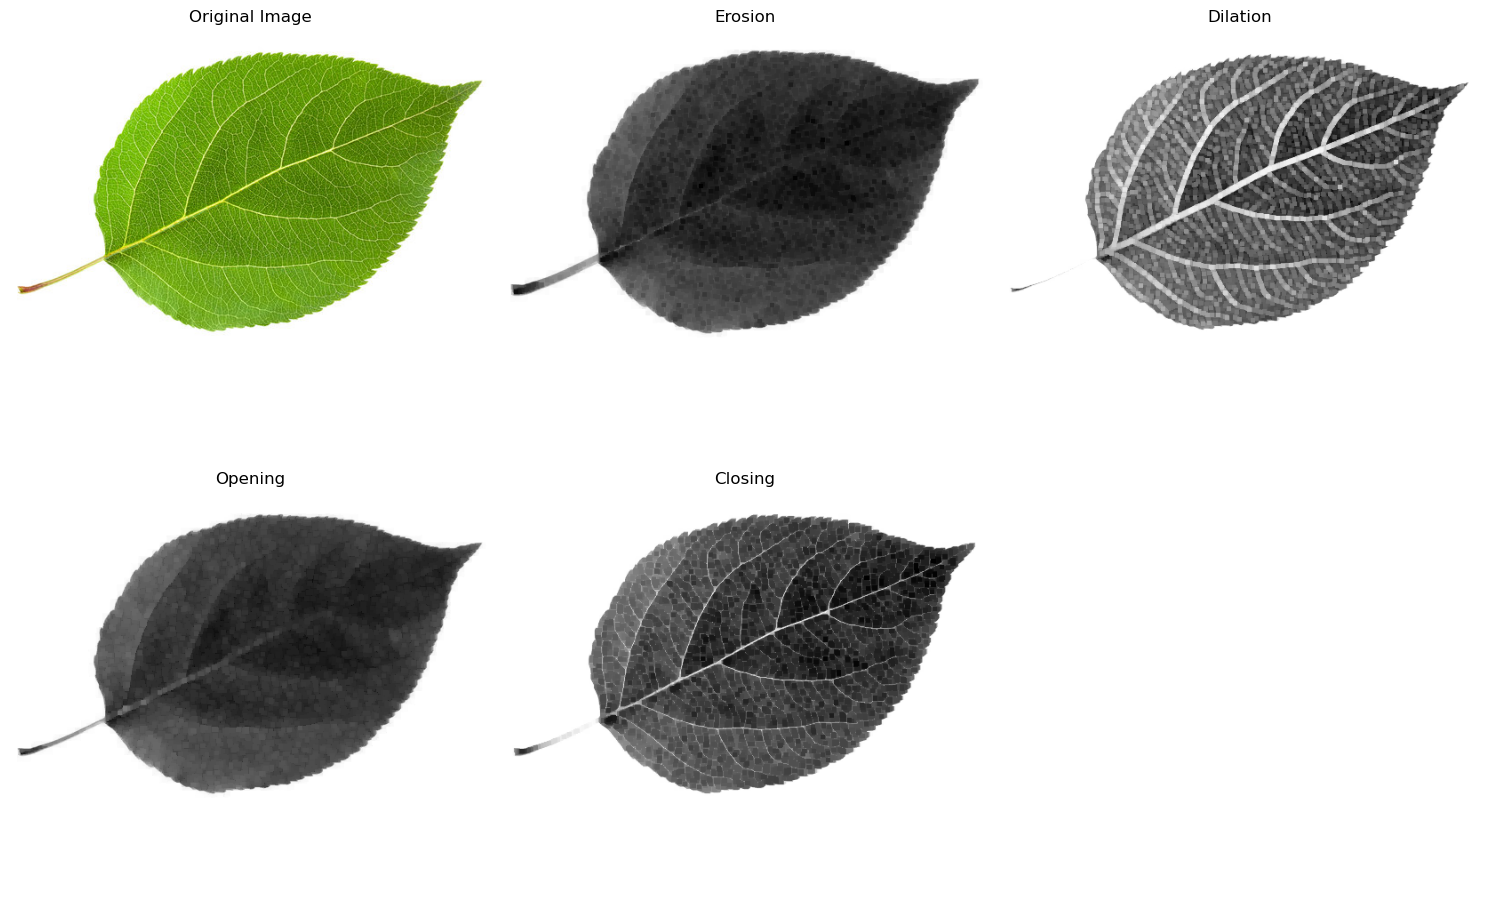

In [65]:


# Perform erosion
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(gray_img, kernel, iterations=1)

# Perform dilation
dilation = cv2.dilate(gray_img, kernel, iterations=1)

# Perform opening (erosion followed by dilation)
opening = cv2.morphologyEx(gray_img, cv2.MORPH_OPEN, kernel)

# Perform closing (dilation followed by erosion)
closing = cv2.morphologyEx(gray_img, cv2.MORPH_CLOSE, kernel)

# Display the original and morphological operation results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(erosion, cmap='gray')
axes[0, 1].set_title('Erosion')
axes[0, 1].axis('off')

axes[0, 2].imshow(dilation, cmap='gray')
axes[0, 2].set_title('Dilation')
axes[0, 2].axis('off')

axes[1, 0].imshow(opening, cmap='gray')
axes[1, 0].set_title('Opening')
axes[1, 0].axis('off')

axes[1, 1].imshow(closing, cmap='gray')
axes[1, 1].set_title('Closing')
axes[1, 1].axis('off')

# Hide the empty subplot in the last column
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

Image Morphology:
Perform morphological operations like erosion, dilation, opening, and closing to manipulate the shape and structure of objects in images.

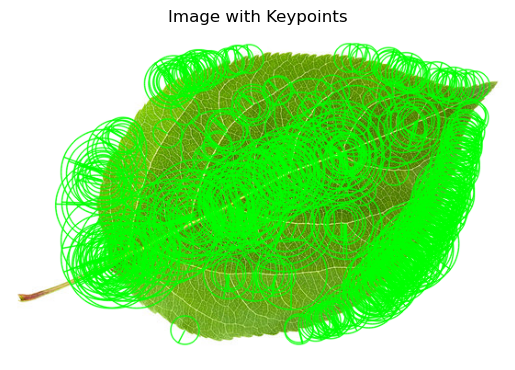

In [66]:

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray_img, None)

# Draw keypoints on the image
keypoints_img = cv2.drawKeypoints(main_img, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(keypoints_img, cv2.COLOR_BGR2RGB))
plt.title('Image with Keypoints')
plt.axis('off')
plt.show()

Feature Detection and Description:
Use feature detection algorithms like SIFT, SURF, or ORB to detect and describe keypoints in images.

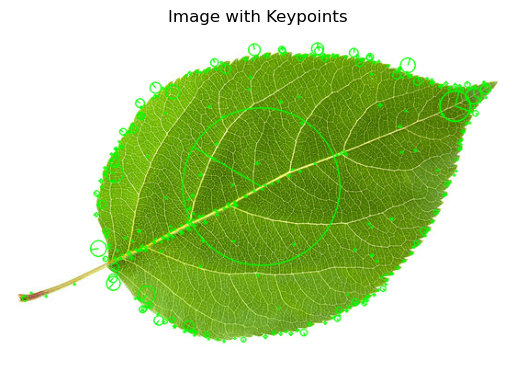

In [70]:
# Convert the images to grayscale
gray_main_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_main, descriptors_main = sift.detectAndCompute(gray_main_img, None)

# Draw keypoints on the image
keypoints_img = cv2.drawKeypoints(main_img, keypoints_main, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(keypoints_img, cv2.COLOR_BGR2RGB))
plt.title('Image with Keypoints')
plt.axis('off')
plt.show()


Image Registration:
Register or align images using techniques such as feature-based registration or intensity-based registration to combine multiple images.

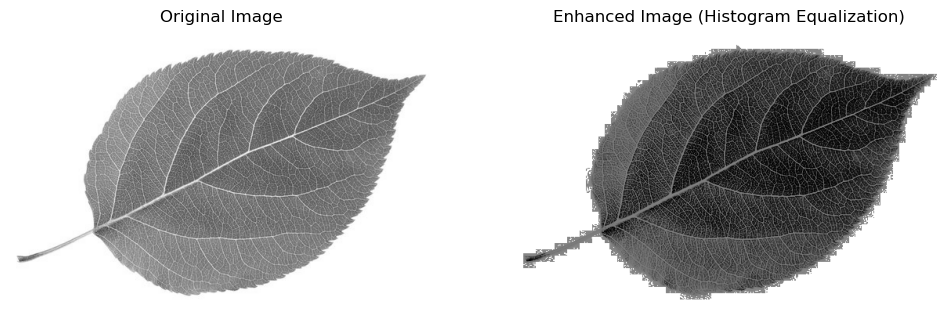

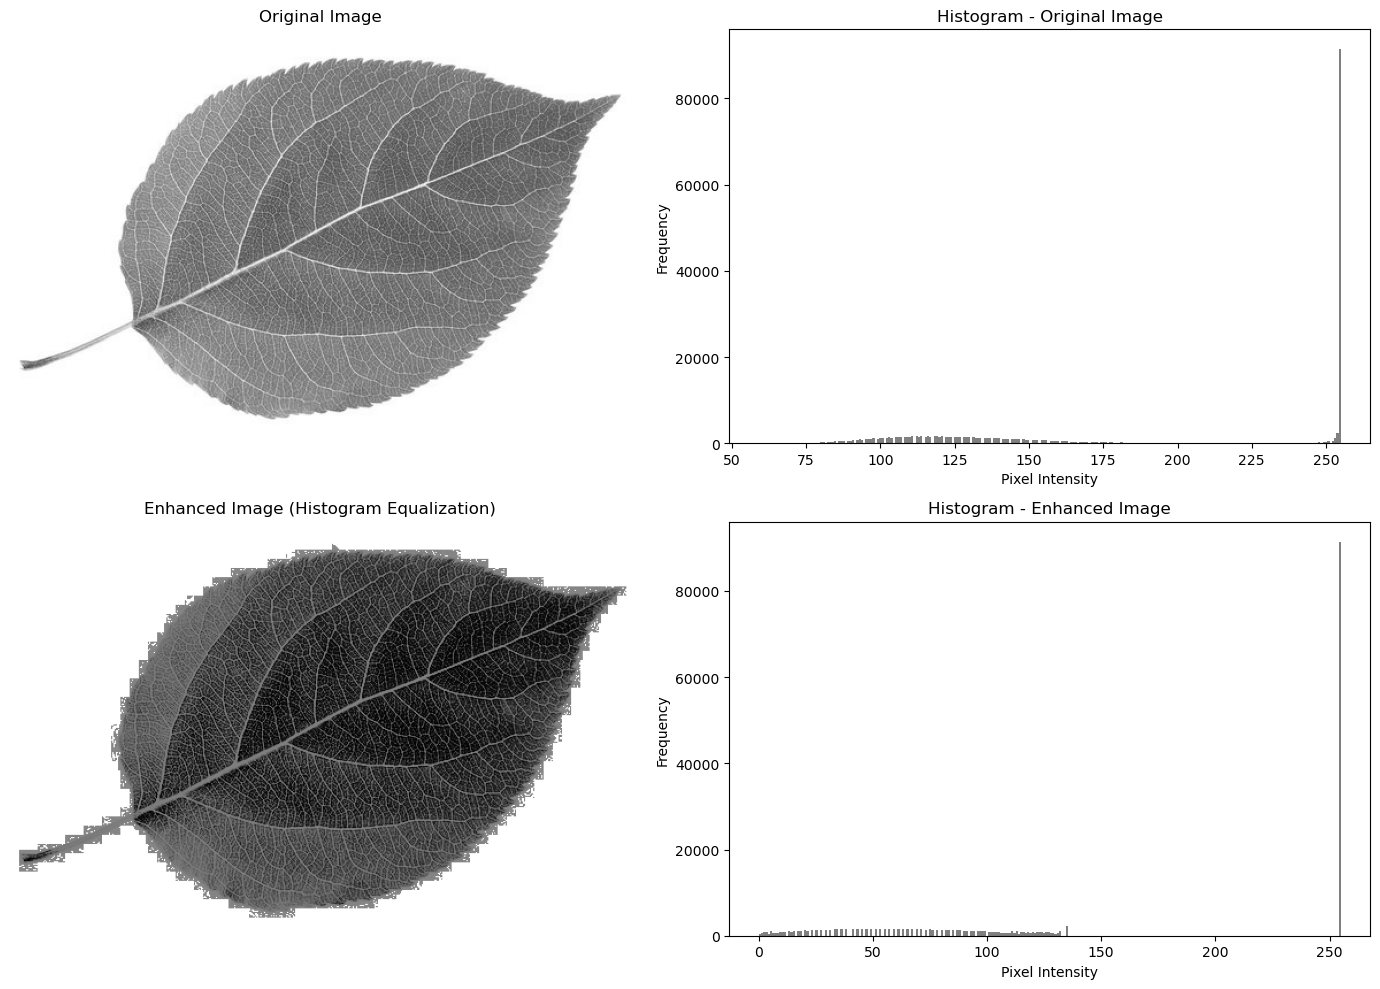

In [12]:
# Apply histogram equalization
equalized_img = cv2.equalizeHist(gray_img)

# Display original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_GRAY2RGB))
axes[1].set_title('Enhanced Image (Histogram Equalization)')
axes[1].axis('off')



# Apply histogram equalization
equalized_img = cv2.equalizeHist(gray_img)

# Display original and enhanced images along with their histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot original image
axes[0, 0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Plot histogram for original image
axes[0, 1].hist(gray_img.ravel(), bins=256, color='gray')
axes[0, 1].set_title('Histogram - Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Plot enhanced image
axes[1, 0].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_GRAY2RGB))
axes[1, 0].set_title('Enhanced Image (Histogram Equalization)')
axes[1, 0].axis('off')

# Plot histogram for enhanced image
axes[1, 1].hist(equalized_img.ravel(), bins=256, color='gray')
axes[1, 1].set_title('Histogram - Enhanced Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Image Enhancement:
Enhance image quality through techniques like histogram equalization, contrast stretching, or adaptive histogram equalization.

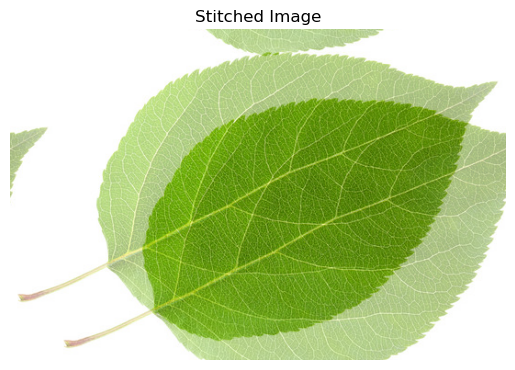

In [72]:
# Duplicate the image
duplicate_img = main_img.copy()

# Offset the duplicate image (for simulating stitching)
offset_x = 50  # Adjust the offset as needed
offset_y = 50  # Adjust the offset as needed
duplicate_img = np.roll(duplicate_img, offset_x, axis=1)
duplicate_img = np.roll(duplicate_img, offset_y, axis=0)

# Blend the duplicate image with the original image
alpha = 0.5  # Blend factor (adjust as needed)
stitched_img = cv2.addWeighted(main_img, alpha, duplicate_img, 1-alpha, 0)

# Display the stitched image
plt.imshow(cv2.cvtColor(stitched_img, cv2.COLOR_BGR2RGB))
plt.title('Stitched Image')
plt.axis('off')
plt.show()

Image Stitching:
Stitch together multiple images to create panoramas or wide-angle views of scenes

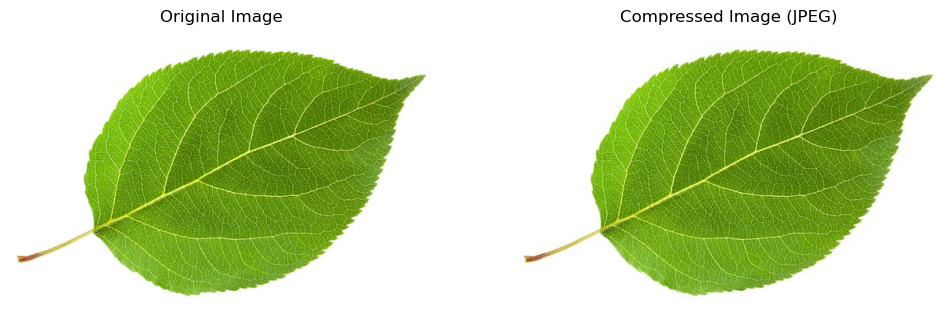

In [73]:
# Define the compression parameters
compression_params = [cv2.IMWRITE_JPEG_QUALITY, 90]  # For JPEG compression, quality ranges from 0 to 100

# Compress the image and save it
success, compressed_img = cv2.imencode('.jpg', main_img, compression_params)

# Check if compression was successful
if success:
    # Decode the compressed image
    compressed_img = cv2.imdecode(compressed_img, 1)

    # Display the original and compressed images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Compressed Image (JPEG)')
    axes[1].axis('off')

    plt.show()
else:
    print("Compression failed.")

Image Compression:
Implement compression algorithms like JPEG or PNG to reduce the size of images while preserving quality.



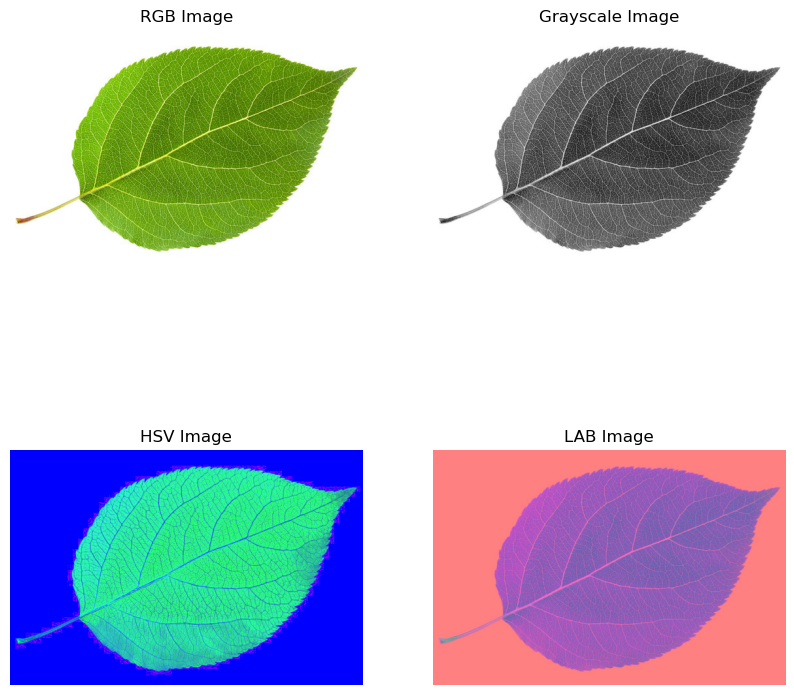

In [74]:
# Convert BGR to HSV
hsv_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2HSV)

# Convert BGR to LAB
lab_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2LAB)

# Display the original and converted images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(rgb_img)
axes[0, 0].set_title('RGB Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray_img, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(hsv_img)
axes[1, 0].set_title('HSV Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(lab_img)
axes[1, 1].set_title('LAB Image')
axes[1, 1].axis('off')

plt.show()

Color Space Conversion:
Convert images between different color spaces such as RGB, grayscale, HSV, or LAB for various image processing tasks.

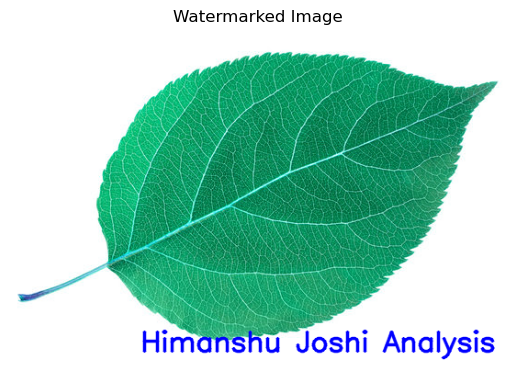

In [75]:
# Define the watermark text
watermark_text = "Himanshu Joshi Analysis"

# Define the font properties
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2
font_color = (0, 0, 255)  # Red color

# Get the size of the text
text_size = cv2.getTextSize(watermark_text, font, font_scale, font_thickness)[0]

# Calculate the position to place the watermark (bottom-right corner)
text_x = main_img.shape[1] - text_size[0] - 10
text_y = main_img.shape[0] - 10

# Add the watermark to the image
watermarked_img = main_img.copy()
cv2.putText(watermarked_img, watermark_text, (text_x, text_y), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

# Display the watermarked image
plt.imshow(watermarked_img)
plt.title('Watermarked Image')
plt.axis('off')
plt.show()

Image Watermarking:
Embed watermarks into images for copyright protection or ownership identification purposes.


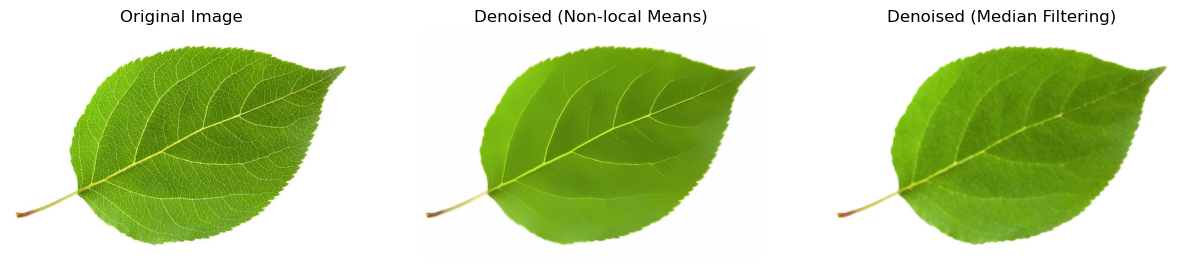

In [76]:
# Denoise using Non-local Means Denoising
denoised_img1 = cv2.fastNlMeansDenoisingColored(main_img, None, 10, 10, 7, 21)

# Denoise using Median Filtering
denoised_img2 = cv2.medianBlur(main_img, 5)

# Display the original and denoised images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(main_img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(denoised_img1, cv2.COLOR_BGR2RGB))
axes[1].set_title('Denoised (Non-local Means)')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(denoised_img2, cv2.COLOR_BGR2RGB))
axes[2].set_title('Denoised (Median Filtering)')
axes[2].axis('off')

plt.show()

Image Denoising:
Remove noise from images using denoising techniques like Gaussian noise reduction, median filtering, or wavelet denoising.


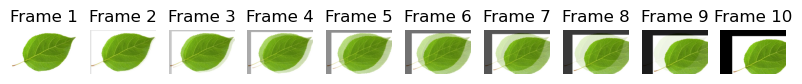

In [77]:
# Define the number of frames for the morphing animation
num_frames = 10

# Define the morphing parameters
alpha_values = np.linspace(0, 1, num_frames)

# Initialize a list to store the morphed images
morphed_images = []

# Perform morphing
for alpha in alpha_values:
    # Apply geometric warping (simple translation for demonstration)
    morphed_img = cv2.warpAffine(main_img, np.float32([[1, 0, alpha * 100], [0, 1, alpha * 50]]), (main_img.shape[1], main_img.shape[0]))
    
    # Blend the original and morphed images using cross-dissolving
    blended_img = cv2.addWeighted(main_img, 1-alpha, morphed_img, alpha, 0)
    
    # Append the blended image to the list
    morphed_images.append(blended_img)

# Display the morphing animation
plt.figure(figsize=(10, 10))
for i, img in enumerate(morphed_images):
    plt.subplot(1, num_frames, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Frame {i+1}')

plt.show()

Image Morphing:
Create smooth transitions between images by morphing one image into another using techniques like geometric warping and cross-dissolving.

